# **Nama : Faiz Rofi Hencya**


# **Kelas : IF-43-11**

# **NIM : 1301190230**

# **Tugas Besar Matakuliah Pembelajaran Mesin Semester Ganjil 2021-2022**

# Part 1: Clustering memakai k-Means

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import csv
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from google.colab import files
import random

## **1. Eksplorasi Data**

### **Membaca data**

In [ ]:
#Membaca dataset

#Membaca dataset dengan ekstensi csv dari link github ke variabel "df"
df_raw = pd.read_csv('https://github.com/Hencya/Tubes_Malin/blob/main/kendaraan_train.csv?raw=true')

# Menampilkan Data sample
df_raw.sample(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
137517,137518,NaN,61.0,1.0,28.0,0.0,1-2 Tahun,Tidak,54946.0,26.0,170.0,0
143411,143412,Pria,51.0,1.0,45.0,0.0,1-2 Tahun,Pernah,35164.0,26.0,67.0,0
134017,134018,Wanita,28.0,1.0,8.0,1.0,< 1 Tahun,Tidak,NaN,152.0,203.0,0
38931,38932,Wanita,24.0,1.0,37.0,1.0,< 1 Tahun,Tidak,30257.0,152.0,220.0,0
8564,8565,Pria,23.0,1.0,46.0,1.0,< 1 Tahun,Tidak,45856.0,152.0,NaN,0
143015,143016,Pria,62.0,1.0,48.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,92.0,0
5311,5312,Wanita,22.0,1.0,4.0,0.0,< 1 Tahun,Pernah,36006.0,152.0,129.0,0
7257,7258,Wanita,26.0,1.0,41.0,1.0,< 1 Tahun,Tidak,NaN,152.0,70.0,0
227664,227665,Wanita,23.0,1.0,13.0,NaN,< 1 Tahun,Pernah,25309.0,152.0,82.0,0
183377,183378,Pria,38.0,1.0,45.0,0.0,1-2 Tahun,Pernah,34840.0,124.0,97.0,0


### **Melihat info data**

In [ ]:
#Melihat info data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


### **Melihat deskripsi data**



In [ ]:
#Melihat deskripsi data
df_raw.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### **Cek duplicate data set**

In [ ]:
# Cek duplicate data set
print('Banyak nya data duplicate pada dataset : ', df_raw[df_raw.duplicated()].shape)

Banyak nya data duplicate pada dataset :  (0, 12)


### **Check missing value**

In [ ]:
#Mengecek Missing Value dan presentasenya
percent_missing = df_raw.isnull().sum() * 100 / len(df_raw)

print("\n---Jumlah Missing Value---")
print(df_raw.isna().sum())
print("\n----------Presentase---------")
print(percent_missing)


---Jumlah Missing Value---
id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

----------Presentase---------
id                   0.000000
Jenis_Kelamin        5.051936
Umur                 4.972869
SIM                  5.039341
Kode_Daerah          5.005055
Sudah_Asuransi       4.978116
Umur_Kendaraan       4.994210
Kendaraan_Rusak      4.963772
Premi                5.097068
Kanal_Penjualan      5.002606
Lama_Berlangganan    4.895200
Tertarik             0.000000
dtype: float64


### **Check outliers dengan IQR dan BOXPLOT**

In [ ]:
#Check Batas bawah, Batas atas, Q1, Q2, Q3, IQR, varians dan simpangan baku
for coloumn in df_raw.columns:
  if df_raw[coloumn].dtypes == 'object':
    pass
  else:
    q1 = df_raw[coloumn].describe()['25%']
    q2 = df_raw[coloumn].describe()['50%']
    q3 = df_raw[coloumn].describe()['75%']
    varians = df_raw[coloumn].var()
    simp_baku  = df_raw[coloumn].std()
    IQR = q3-q1
    bb = q1 - (1.5*IQR)
    ba = q3 + (1.5*IQR)
    print("Kolom                  = ",coloumn)
    print("Batas Bawah            = ", bb)
    print("Batas Atas             = ", ba)
    print("Q1                     = ", q1)
    print("Q2                     = ", q1)
    print("Q3                     = ", q3)
    print("IQR                    = ", IQR)
    print("varians                = ", varians)
    print("simpangan baku         = ", simp_baku)
    print(" ")

Kolom                  =  id
Batas Bawah            =  -142914.0
Batas Atas             =  428746.0
Q1                     =  71458.5
Q2                     =  71458.5
Q3                     =  214373.5
IQR                    =  142915.0
varians                =  6808303866.0
simpangan baku         =  82512.44673381101
 
Kolom                  =  Umur
Batas Bawah            =  -11.0
Batas Atas             =  85.0
Q1                     =  25.0
Q2                     =  25.0
Q3                     =  49.0
IQR                    =  24.0
varians                =  240.94760753559754
simpangan baku         =  15.522487156882995
 
Kolom                  =  SIM
Batas Bawah            =  1.0
Batas Atas             =  1.0
Q1                     =  1.0
Q2                     =  1.0
Q3                     =  1.0
IQR                    =  0.0
varians                =  0.002146969968324258
simpangan baku         =  0.04633540728561968
 
Kolom                  =  Kode_Daerah
Batas Bawah            =

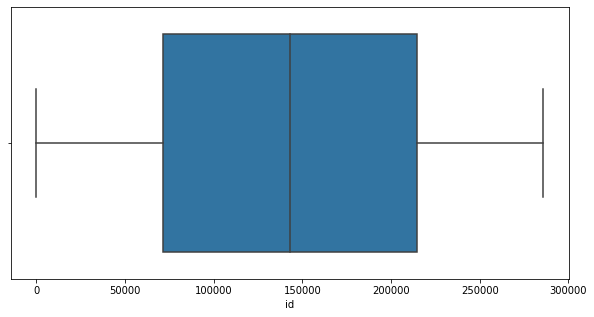

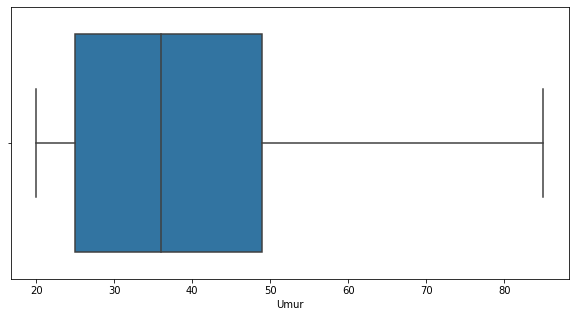

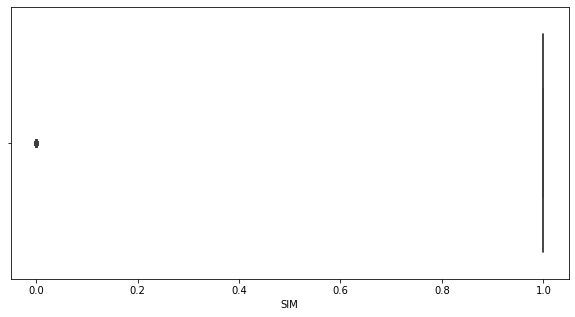

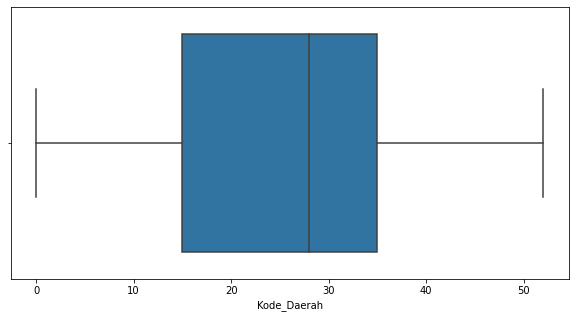

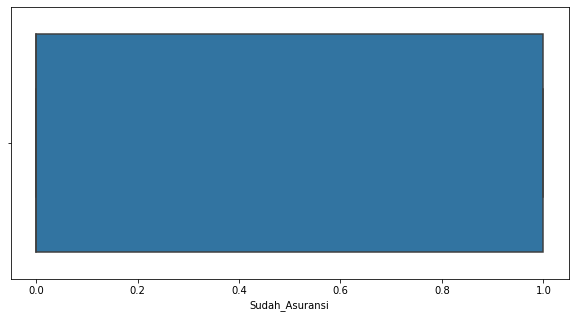

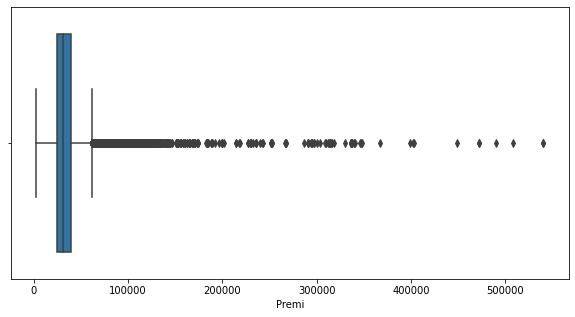

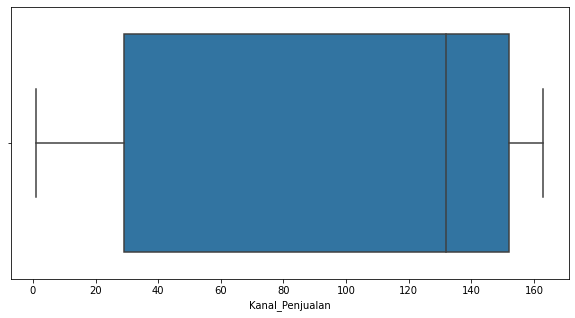

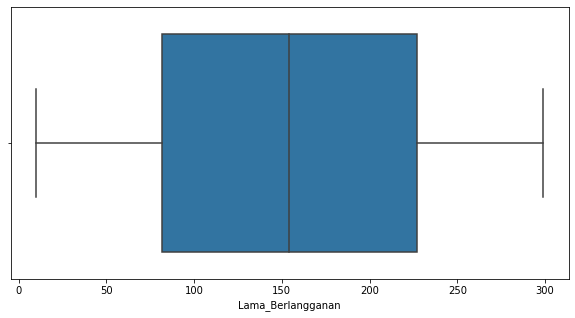

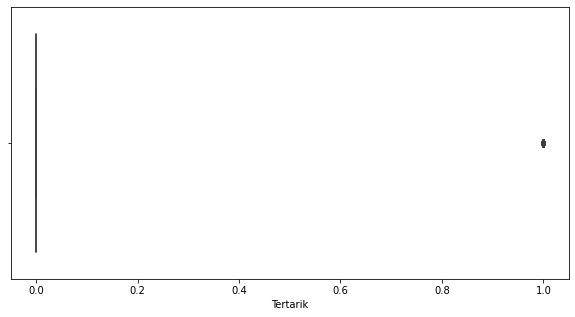

In [ ]:
#boxplot
for feature in df_raw.columns:
  if df_raw[feature].dtypes == 'object':
    pass
  else:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x=df_raw[feature])

### **Check korelasi data raw**

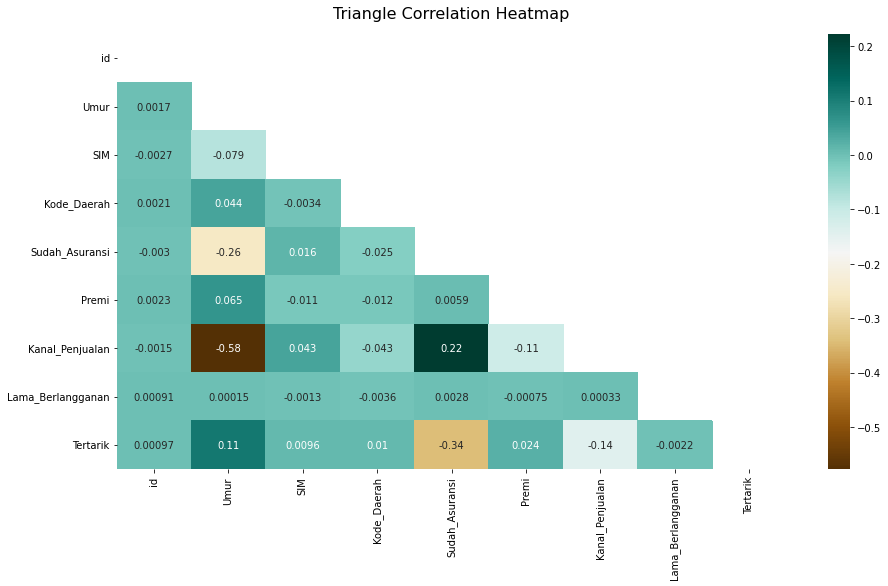

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_raw.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_raw.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

## **2. Persiapan Data**

### **Hapus kolom yang tidak diperlukan dari data**

In [ ]:
#Drop colom id dan tertarik
df_proses  = df_raw.drop(["id", "Tertarik"], axis = 1)
df_proses

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


### **Encode data string -> integer**

In [ ]:
#Encoder String -> Integer

# Encoder data frame agar semua Data bisa diolah
#Umur kendaraan
df_proses['Umur_Kendaraan'] = df_proses['Umur_Kendaraan'].replace(['< 1 Tahun'], 0)
df_proses['Umur_Kendaraan'] = df_proses['Umur_Kendaraan'].replace(['1-2 Tahun'], 1)
df_proses['Umur_Kendaraan'] = df_proses['Umur_Kendaraan'].replace(['> 2 Tahun'], 2)

# Kendaraan Rusak
df_proses['Kendaraan_Rusak'] = df_proses['Kendaraan_Rusak'].replace(['Tidak'], 0)
df_proses['Kendaraan_Rusak'] = df_proses['Kendaraan_Rusak'].replace(['Pernah'], 1)

#Jenis Kelamin
df_proses['Jenis_Kelamin'] = df_proses['Jenis_Kelamin'].replace(['Wanita'], 0)
df_proses['Jenis_Kelamin'] = df_proses['Jenis_Kelamin'].replace(['Pria'], 1)

df_proses

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0


In [ ]:
#Mengubah data kategorikal menjadi tipedata object
df_proses = df_proses.astype({"Jenis_Kelamin": object,"SIM": object, "Kode_Daerah": object, "Sudah_Asuransi": object, "Kanal_Penjualan": object})
df_proses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  object 
 3   Kode_Daerah        271525 non-null  object 
 4   Sudah_Asuransi     271602 non-null  object 
 5   Umur_Kendaraan     271556 non-null  float64
 6   Kendaraan_Rusak    271643 non-null  float64
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  object 
 9   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(5), object(5)
memory usage: 21.8+ MB


### **Menangani missing value**




In [ ]:
#Menangani Missing values
""" 
Note !!!
Mengganti dengan:
  - "Mean" jika untuk variabel bertipe Numerik.
  - "Mode" jika untuk variabel bertipe kategorikal.
"""

for column in df_proses.columns:
  if df_proses[column].dtypes == 'object':
    df_proses[column].fillna(df_proses[column].mode()[0], inplace = True)
  else:
    df_proses[column].fillna(df_proses[column].mean(), inplace = True)

df_proses

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.000000,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0
1,1.000000,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0
2,0.540467,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0
3,0.000000,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0
4,1.000000,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,0.000000,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0
285827,0.000000,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0
285828,0.000000,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0
285829,1.000000,68.0,1.0,7.0,1.0,1.0,0.000000,30503.0,124.0,270.0


### **Menangani outliers**

In [ ]:
# Menangani data outlier Column "Premi"
# Handling dengan IQR
print('Persebaran data sebelum outlier ditangani: ')
print(df_proses['Premi'].describe())

# Mencari Q1,Q2 dan IQR
Q1 = (df_proses['Premi']).quantile(0.25)
Q3 = (df_proses['Premi']).quantile(0.75)
IQR = Q3 - Q1

# Mencari Minimum dan Maximum Value
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

# Mencari data pencilan di Q3 dan Q1
more_than = (df_proses['Premi'] > maximum)
lower_than = (df_proses['Premi'] < minimum)

# Menghapus nilai pencilan
df_proses['Premi'] = df_proses['Premi'].mask(more_than, maximum, axis=0)
df_proses['Premi'] = df_proses['Premi'].mask(lower_than, minimum, axis=0)


print('\nNilai Maximum adalah: ')
print(maximum)

print('\nNilai Minimum adalah: ')
print(minimum)


print('\nPersebaran data setelah ditangani Outlier: ')
print(df_proses['Premi'].describe())

Persebaran data sebelum outlier ditangani: 
count    285831.000000
mean      30536.683472
std       16712.080405
min        2630.000000
25%       24929.000000
50%       30949.000000
75%       38845.000000
max      540165.000000
Name: Premi, dtype: float64

Nilai Maximum adalah: 
59719.0

Nilai Minimum adalah: 
4055.0

Persebaran data setelah ditangani Outlier: 
count    285831.000000
mean      30319.014339
std       14532.026281
min        4055.000000
25%       24929.000000
50%       30949.000000
75%       38845.000000
max       59719.000000
Name: Premi, dtype: float64


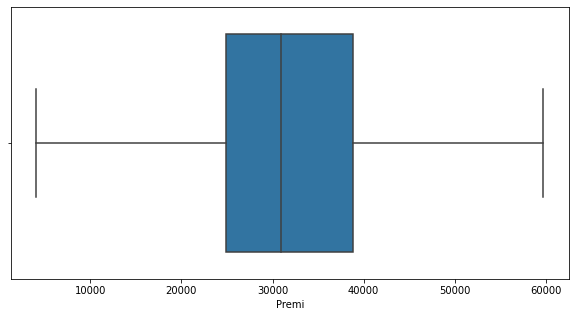

In [ ]:
#Menampilkan bloxplot premi
plt.figure(figsize=(10,5))
sns.boxplot(x=df_proses['Premi'])

### **Feature Scaling**

In [ ]:
#MinMax Scaling
for column in df_proses.columns:
  df_proses[column] = (df_proses[column] - df_proses[column].min()) / (df_proses[column].max() - df_proses[column].min())

df_proses

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.000000,0.153846,1.0,0.634615,1.0,0.0,0.000000,0.430691,0.932099,0.301038
1,1.000000,0.430769,1.0,0.750000,0.0,1.0,1.000000,0.390647,0.172840,0.512111
2,0.540467,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.515198,0.981481,0.377163
3,0.000000,0.584615,1.0,0.923077,0.0,0.5,0.000000,0.000000,0.759259,0.183391
4,1.000000,0.461538,1.0,0.673077,0.0,1.0,0.504791,0.553356,0.537037,0.636678
...,...,...,...,...,...,...,...,...,...,...
285826,0.000000,0.046154,1.0,0.076923,1.0,0.0,0.000000,0.394025,0.932099,0.716263
285827,0.000000,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.729933,0.932099,0.138408
285828,0.000000,0.046154,1.0,0.961538,1.0,0.0,0.000000,0.820926,0.932099,0.747405
285829,1.000000,0.738462,1.0,0.134615,1.0,0.5,0.000000,0.475137,0.759259,0.899654


## **Data Clean**

In [ ]:
df_clean = df_proses

In [ ]:
#Check Info data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  float64
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  float64
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
dtypes: float64(10)
memory usage: 21.8 MB


In [ ]:
#Cek missing value
df_clean.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

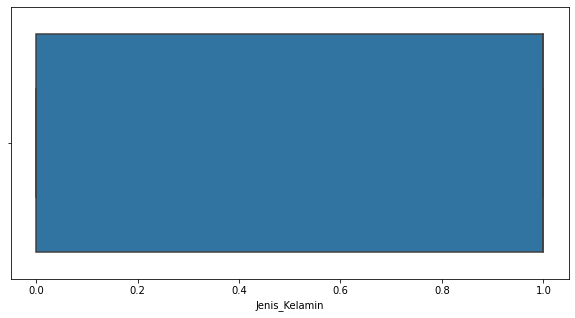

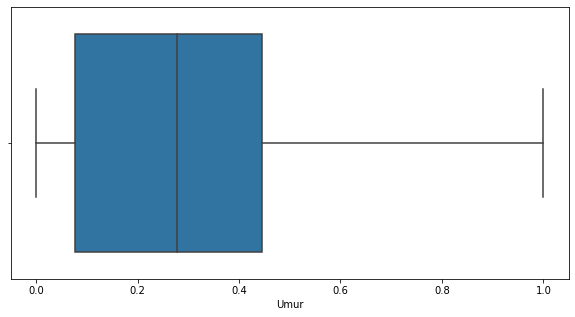

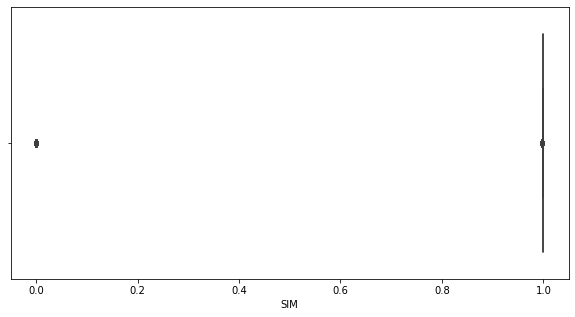

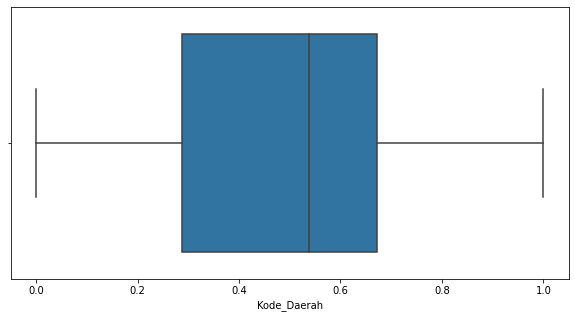

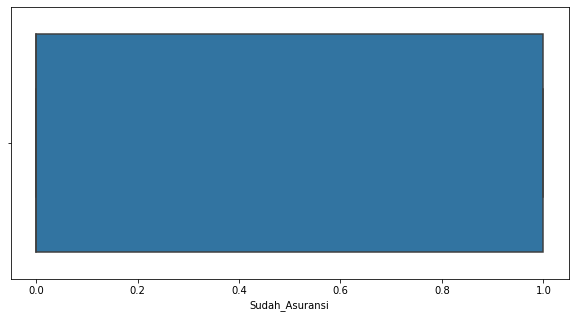

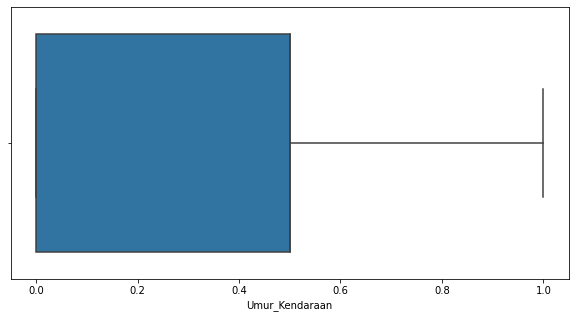

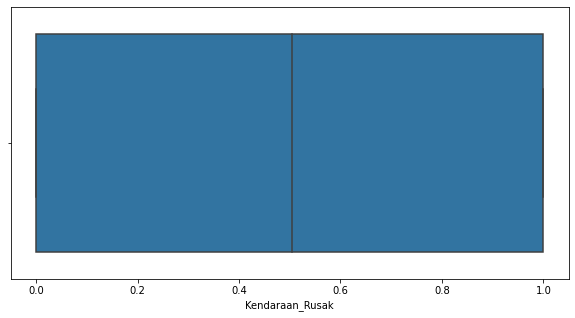

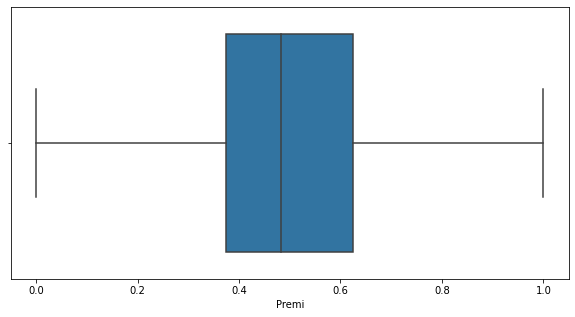

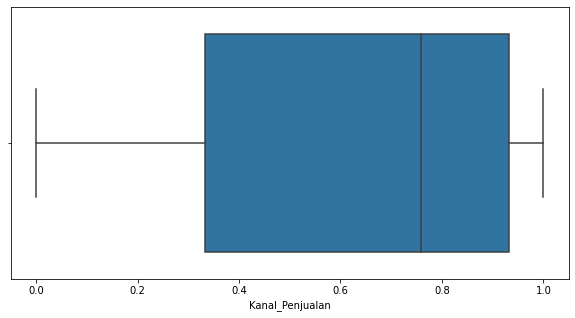

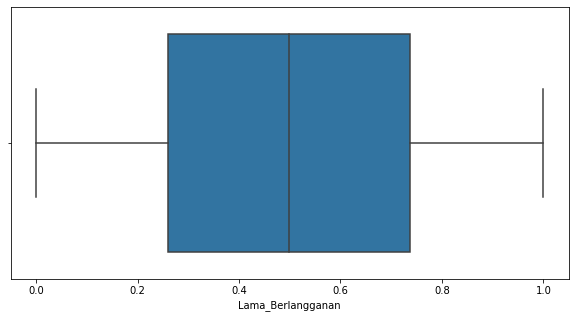

In [ ]:
#Check BoxPlot
for columns in df_clean.columns:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=df_clean[columns])

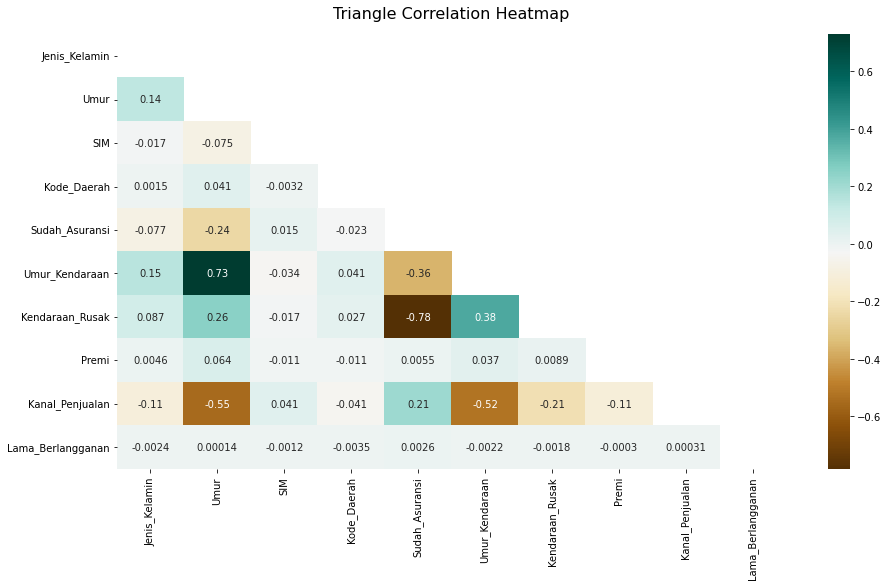

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_clean.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

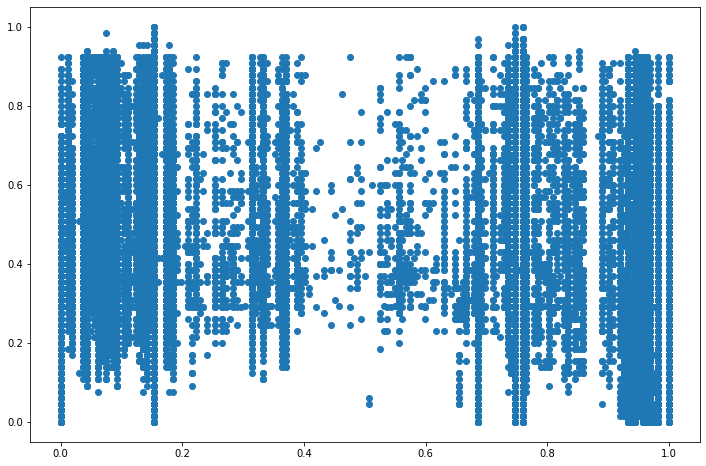

In [ ]:
#Check Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(x = df_clean['Kanal_Penjualan'], y = df_clean['Umur'])
plt.show()

In [ ]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df_clean))

Total Data : 285831


## **3. K-MEANS Algorithm**

In [ ]:
# Pembuatan method euclidean, untuk menghitung jarak antar kedua centroid
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
# Method untuk memberhentikan ketika centroid saat ini bernilai sama dengan centroid sebelumnya
def isCentroidSame(prevCentroid, currCentroid, k):
    for i in range(k):
        if (prevCentroid.get(i) != currCentroid.get(i))[0]:
            return False

    return True

In [ ]:
def kmeans(k, max_iter, df):
    total_wcss = 0
    # Menginisialisasi variabel centroid dengan memilih random centroid pada data 
    currCentroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    
    # Mengcopy data centroid saat ini untuk dijadikan previous centroid
    prevCentroid = currCentroid.copy()
    
    for _ in range(max_iter):
        # Menginisialisasi variabel Cluster dan mengisis setiap keynya
        cluster = {i: [] for i in range(k)}
        wcss = []

        # Mecari nilai terdekat untuk setiap centroid dengan menggunakan metode euclidean
        for x in df:
            dist = [euclidean(x, currCentroid[c]) for c in currCentroid]
            wcss.append(np.min(dist))
            cluster[dist.index(min(dist))].append(x)
            
        # Mencari Nilai Centroid Ulang Dari Setiap Cluster
        # Yang Telah Dicari Sebelumnya Menggunakan Mean
        for cl in cluster:
            currCentroid[cl] = np.mean(cluster[cl], axis=0)
            
        # Mengecek Jika Centroid Telah Mencapai Nilai Maksimum / Konvergen
        if isCentroidSame(prevCentroid, currCentroid, k): break

        # Mengcopy Centroid Yang Telah Berubah Dari Perhitungan Sebelumnya
        prevCentroid = currCentroid.copy()

    return currCentroid, cluster, sum(wcss)

In [ ]:
def initCluster(cluster):
    # Menginisialisasi Array Untuk Data Cluster
    df = []

    # Memasukan hasil dari k-means ke dalam array cluster
    for key in cluster[1].keys():
        for c in cluster[1].get(key):
            df.append((c[0], c[1], key))

    # Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
    df = pd.DataFrame(df)
    df.columns = ['Kanal_Penjualan', 'Umur', 'Cluster']
    
    return df

In [ ]:
def visualizeCluster(cluster_all):
    # Menginisialisasi Array Untuk Hasil Klasterisasi
    clusterize = []

    # Subplot Untuk Plot Chart Beserta Inisialisasi Nilai Baris Dan Kolomnya
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    row = 0
    col = 0
   
    for cluster in cluster_all: 
        # Membuat Dataframe Untuk Setiap Cluster Dan Memasukkan Jenis Clusternya Untuk Menghitung Score
        df = initCluster(cluster)
        clusterize.append(df)

        # Set Warna Setiap Cluster
        colors = ['r', 'g', '#0080ff', '#e69500', '#bd17ff']

        # Set Title Untuk Setiap Plottingan Cluster
        axs[col, row].set_title(f'Model Dengan {cluster[0]} Cluster', fontsize=14)

        # Melakukan Looping Setiap Titik Data Dan Centroid
        for i in range(cluster[0]):
            axs[col][row].scatter(
                df['Kanal_Penjualan'][df['Cluster'] == i],
                df['Umur'][df['Cluster'] == i],
                color=colors[i],
                label=f'Cluster {i}'
            )

            axs[col][row].scatter(cluster[2][i][0], cluster[2][i][1], color='k', marker='P')

        # Acuan Penampilan Legend Centroid
        axs[col][row].scatter(cluster[2][0][0], cluster[2][0][1], color='k', label="Centroids", marker='P')
                            
        # Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
        axs[col][row].legend(loc='best', bbox_to_anchor=(1, 0.5))

        # Mengatur Row Dan Column Untuk Array Axis Yang Akan Ditampilkan 
        row += 1
        if row == 2: row = 0
        if row == 0 and col == 0: 
            row = 0
            col = 1 

    # Set Label Untuk Axis x Dan y 
    for ax in axs.flat:
        ax.set(xlabel='Kanal_Penjualan', ylabel='Umur')
        ax.label_outer()

    # Mengatur Padding Dan Menampilkan Plot
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()

    return clusterize

## **Main Program**

In [ ]:
df = df_clean[['Kanal_Penjualan', 'Umur']]
df_pure = df.copy()
df.head()

,Kanal_Penjualan,Umur
0,0.932099,0.153846
1,0.172840,0.430769
2,0.981481,0.015385
3,0.759259,0.584615
4,0.537037,0.461538


In [ ]:
# Inisialisasi Array Untuk WCSS Dan Keseluruhan Hasil Cluster
wcss_all = []
cluster_all = [] 

# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Menentukan maximum iterasi sebanyak 50x
max_iter = 50

# Inisialisasi Range K
K = range(2, 6)

# Melakukan Perulangan Untuk Setiap Range
for i in K:

    # Menggunakan Model Yang Telah Dibangun Untuk Mendapatkan Centroid, Cluster Dan Nilai WCSS 
    centroid, cluster, wcss = kmeans(i, max_iter, data)
    print(f'Centroid Cluster-{i}: \n{centroid}\n')
    
    # Memasukkan Setiap Nilai Yang Direturn Kedalam Array
    wcss_all.append(wcss)
    cluster_all.append([i, cluster, centroid])

Centroid Cluster-2: 
{0: array([0.86994781, 0.22693549]), 1: array([0.15346102, 0.47133009])}

Centroid Cluster-3: 
{0: array([0.9160746 , 0.10138642]), 1: array([0.15087183, 0.46969677]), 2: array([0.77932157, 0.47286902])}

Centroid Cluster-4: 
{0: array([0.15085202, 0.46961018]), 1: array([0.78499021, 0.65840008]), 2: array([0.92442772, 0.07655825]), 3: array([0.80255683, 0.33356005])}

Centroid Cluster-5: 
{0: array([0.92568614, 0.06712779]), 1: array([0.94678306, 0.29519497]), 2: array([0.1507997 , 0.46961823]), 3: array([0.78233976, 0.65342067]), 4: array([0.74533304, 0.32601126])}



### **Visualisasi**

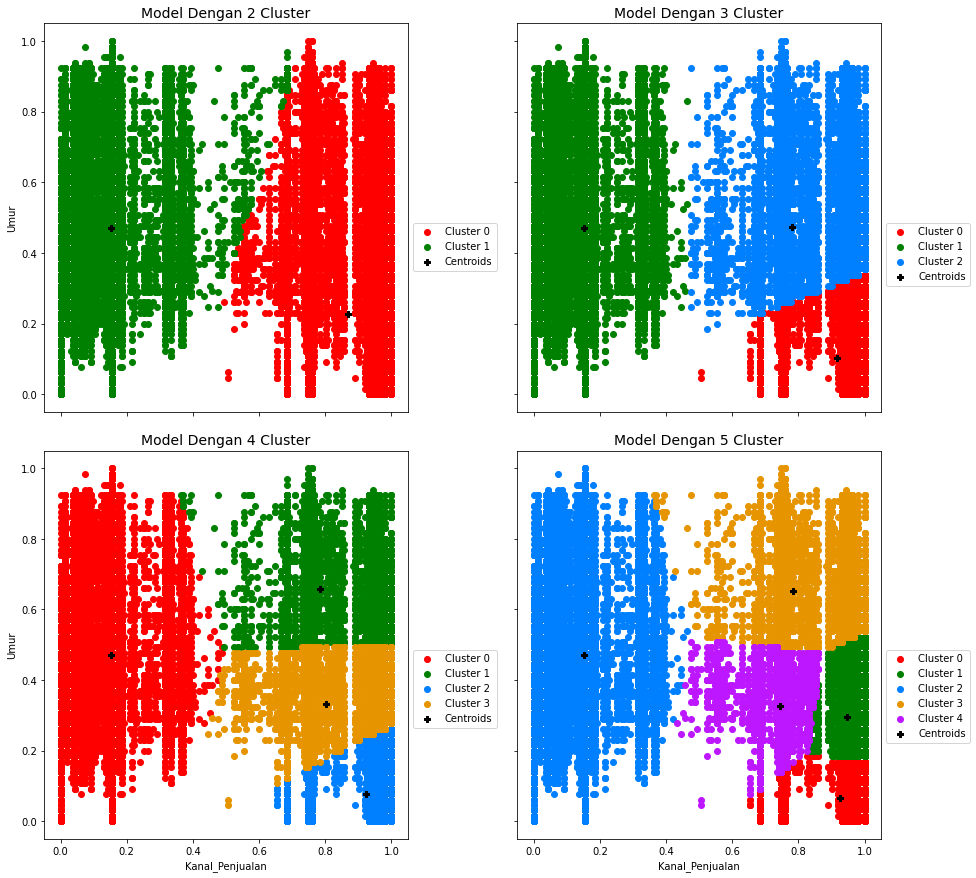

In [ ]:
clusterize = visualizeCluster(cluster_all)

### **Evaluasi**

In [ ]:
# Evaluasi menggunakan sum of squared errors
k_range = range(2,6)
sse = []
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(df)
  sse.append(km.inertia_)
sse

[14553.470341809034, 7087.85700501207, 5194.076331995913, 3479.252279689431]

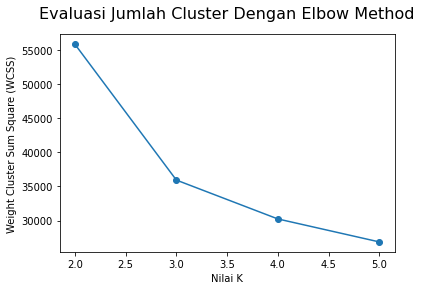

In [ ]:
# Plot data
plt.plot(K, wcss_all, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Weight Cluster Sum Square (WCSS)')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method', fontsize=16, pad=16)
plt.show()

In [ ]:
for i, cluster in enumerate(clusterize):
    score = silhouette_score(cluster[['Kanal_Penjualan', 'Umur']], cluster['Cluster'])
    print(f'Cluster-{i+2}, Silhouette Score = {score}')

Cluster-2, Silhouette Score = 0.6665432986852418
Cluster-3, Silhouette Score = 0.6138339841624476
Cluster-4, Silhouette Score = 0.5948603118141816
Cluster-5, Silhouette Score = 0.5903613962380909


## **Experiment 2**

In [ ]:
df2 = df_clean[['Umur', 'Premi']]
df_pure = df.copy()
df.head()

,Kanal_Penjualan,Umur
0,0.932099,0.153846
1,0.172840,0.430769
2,0.981481,0.015385
3,0.759259,0.584615
4,0.537037,0.461538


In [ ]:
def initCluster2(cluster2):
    # Menginisialisasi Array Untuk Data Cluster
    df2 = []

    # Memasukan hasil dari k-means ke dalam array cluster
    for key in cluster2[1].keys():
        for c in cluster2[1].get(key):
            df2.append((c[0], c[1], key))

    # Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
    df2 = pd.DataFrame(df2)
    df2.columns = ['Umur', 'Premi', 'Cluster2']
    
    return df2

In [ ]:
def visualizeCluster2(cluster_all):
    # Menginisialisasi Array Untuk Hasil Klasterisasi
    clusterize2 = []

    # Subplot Untuk Plot Chart Beserta Inisialisasi Nilai Baris Dan Kolomnya
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    row = 0
    col = 0
   
    for cluster in cluster_all: 
        # Membuat Dataframe Untuk Setiap Cluster Dan Memasukkan Jenis Clusternya Untuk Menghitung Score
        df = initCluster2(cluster2)
        clusterize2.append(df)

        # Set Warna Setiap Cluster
        colors = ['r', 'g', '#0080ff', '#e69500', '#bd17ff']

        # Set Title Untuk Setiap Plottingan Cluster
        axs[col, row].set_title(f'Model Dengan {cluster2[0]} Cluster2', fontsize=14)

        # Melakukan Looping Setiap Titik Data Dan Centroid
        for i in range(cluster2[0]):
            axs[col][row].scatter(
                df['Umur'][df['Cluster2'] == i],
                df['Premi'][df['Cluster2'] == i],
                color=colors[i],
                label=f'Cluster2 {i}'
            )

            axs[col][row].scatter(cluster2[2][i][0], cluster2[2][i][1], color='k', marker='P')

        # Acuan Penampilan Legend Centroid
        axs[col][row].scatter(cluster2[2][0][0], cluster2[2][0][1], color='k', label="Centroids", marker='P')
                            
        # Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
        axs[col][row].legend(loc='best', bbox_to_anchor=(1, 0.5))

        # Mengatur Row Dan Column Untuk Array Axis Yang Akan Ditampilkan 
        row += 1
        if row == 2: row = 0
        if row == 0 and col == 0: 
            row = 0
            col = 1 

    # Set Label Untuk Axis x Dan y 
    for ax in axs.flat:
        ax.set(xlabel='Umur', ylabel='Premi')
        ax.label_outer()

    # Mengatur Padding Dan Menampilkan Plot
    plt.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()

    return clusterize2

In [ ]:
# Inisialisasi Array Untuk WCSS Dan Keseluruhan Hasil Cluster
wcss_all = []
cluster_all = [] 

# Merubah DataFrame Menjadi Numpy Array
data = df2.to_numpy()

# Menentukan maximum iterasi sebanyak 50x
max_iter = 50

# Inisialisasi Range K
K = range(2, 6)

# Melakukan Perulangan Untuk Setiap Range
for i in K:

    # Menggunakan Model Yang Telah Dibangun Untuk Mendapatkan Centroid, Cluster Dan Nilai WCSS 
    centroid, cluster, wcss = kmeans(i, max_iter, data)
    print(f'Centroid Cluster-{i}: \n{centroid}\n')
    
    # Memasukkan Setiap Nilai Yang Direturn Kedalam Array
    wcss_all.append(wcss)
    cluster_all.append([i, cluster, centroid])

Centroid Cluster-2: 
{0: array([0.18008235, 0.32875375]), 1: array([0.43518734, 0.66108201])}

Centroid Cluster-3: 
{0: array([0.12707992, 0.52281735]), 1: array([0.32266269, 0.01080257]), 2: array([0.52922274, 0.63293636])}

Centroid Cluster-4: 
{0: array([0.13078242, 0.47020531]), 1: array([0.24181666, 0.80571297]), 2: array([0.57715691, 0.57645649]), 3: array([0.32273762, 0.00463706])}

Centroid Cluster-5: 
{0: array([0.32202467, 0.00220591]), 1: array([0.22775257, 0.82813508]), 2: array([0.37523231, 0.49641327]), 3: array([0.07687698, 0.47453642]), 4: array([0.6857688 , 0.64577398])}



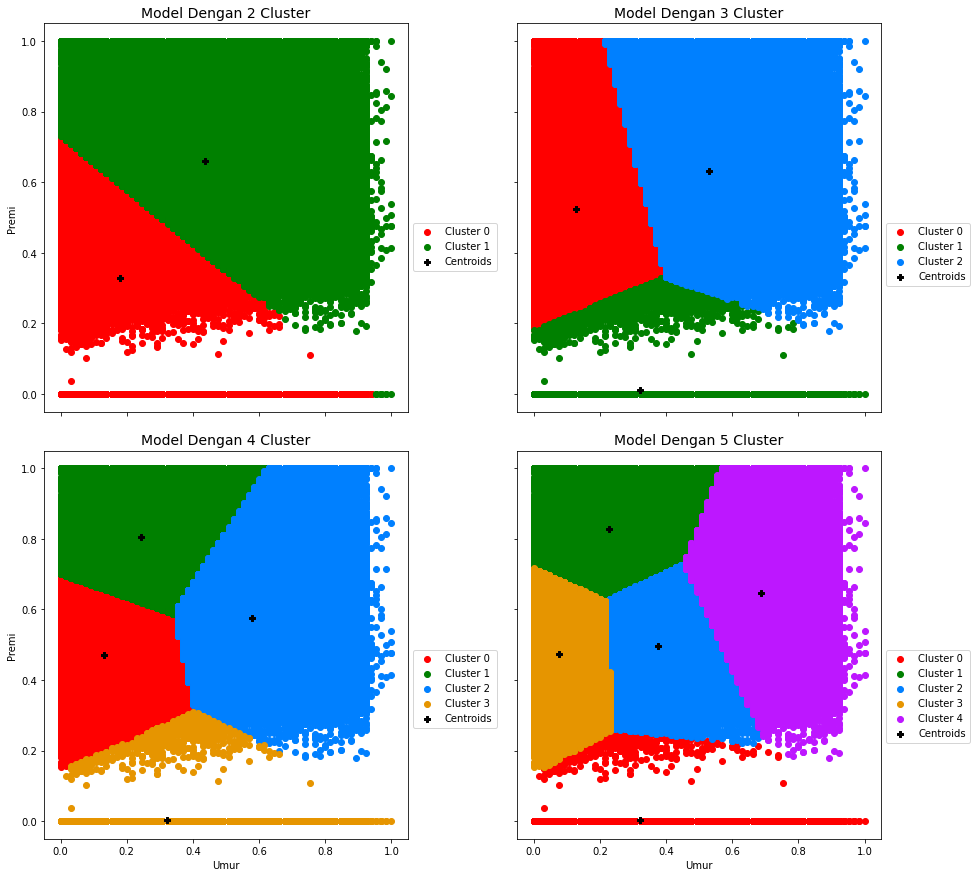

In [ ]:
clusterize2 = visualizeCluster2(cluster_all)

In [ ]:
# Evaluasi menggunakan sum of squared errors
k_range = range(2,6)
sse = []
for i in k_range:
  km = KMeans(n_clusters=i)
  km.fit(df2)
  sse.append(km.inertia_)
sse

[22477.12432066709, 12745.933047230832, 9833.0332123328, 7696.503523454651]

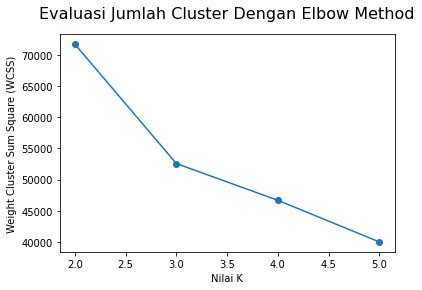

In [ ]:
# Plot data
plt.plot(K, wcss_all, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Weight Cluster Sum Square (WCSS)')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method', fontsize=16, pad=16)
plt.show()

In [ ]:
for i, cluster in enumerate(clusterize2):
    score = silhouette_score(cluster[['Umur', 'Premi']], cluster['Cluster'])
    print(f'Cluster-{i+2}, Silhouette Score = {score}')

Cluster-2, Silhouette Score = 0.341125449369964
Cluster-3, Silhouette Score = 0.451764391083119
Cluster-4, Silhouette Score = 0.4330267279466717
Cluster-5, Silhouette Score = 0.4388948513025292
